In [1]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('countries.csv', usecols=['Country','Carbon Footprint'])

# Check for null values and replace with the mean
data.isnull().sum()
data = data.fillna(data.mean())
# Select the features
X = data.iloc[:, [1]].values
print(X)
print(data)

[[1.80000000e-01]
 [8.70000000e-01]
 [1.14000000e+00]
 [2.00000000e-01]
 [1.80491329e+00]
 [1.08000000e+00]
 [8.90000000e-01]
 [1.80491329e+00]
 [4.85000000e+00]
 [4.14000000e+00]
 [1.25000000e+00]
 [4.46000000e+00]
 [6.19000000e+00]
 [2.60000000e-01]
 [3.28000000e+00]
 [2.57000000e+00]
 [4.43000000e+00]
 [5.10000000e-01]
 [1.80491329e+00]
 [6.30000000e-01]
 [6.70000000e-01]
 [1.74000000e+00]
 [2.36000000e+00]
 [9.10000000e-01]
 [1.80491329e+00]
 [3.24000000e+00]
 [2.08000000e+00]
 [1.20000000e-01]
 [4.00000000e-02]
 [1.80491329e+00]
 [1.80491329e+00]
 [1.90000000e-01]
 [5.00000000e+00]
 [3.56000000e+00]
 [8.00000000e-02]
 [1.00000000e-02]
 [2.04000000e+00]
 [2.32000000e+00]
 [6.70000000e-01]
 [2.50000000e-01]
 [4.70000000e-01]
 [7.00000000e-02]
 [1.37000000e+00]
 [2.60000000e-01]
 [2.21000000e+00]
 [1.23000000e+00]
 [2.94000000e+00]
 [3.42000000e+00]
 [2.60000000e+00]
 [1.80491329e+00]
 [1.47000000e+00]
 [8.60000000e-01]
 [1.08000000e+00]
 [1.02000000e+00]
 [8.40000000e-01]
 [3.170000

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

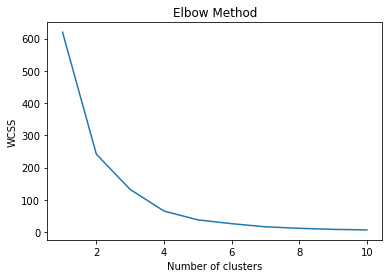

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


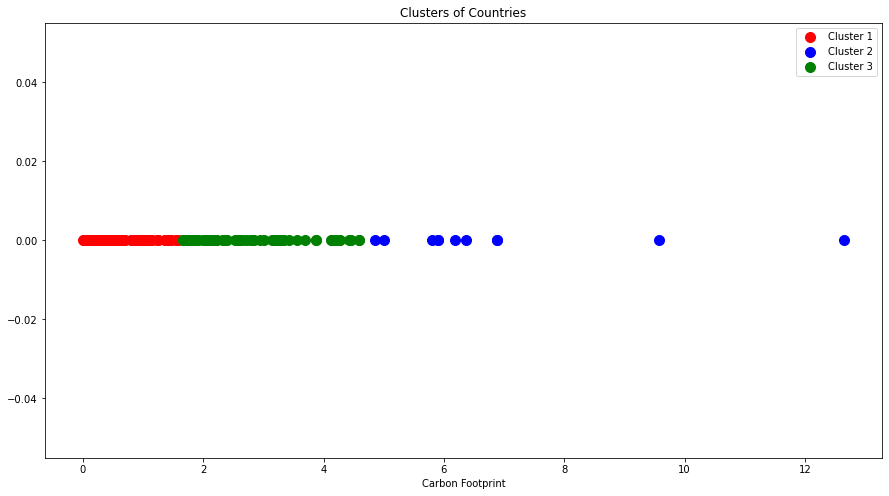

In [2]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)


plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Train the K-means model on 20 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,8))

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], np.zeros_like(X[y_kmeans == 0, 0]), s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], np.zeros_like(X[y_kmeans == 1, 0]), s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], np.zeros_like(X[y_kmeans == 2, 0]), s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Countries')
plt.xlabel('Carbon Footprint')
plt.legend()
plt.show()



In [58]:
#On part sur 3 clusters
kmeans=KMeans(n_clusters=3).fit(X)

#affecter les cluster à la varialb e labels
labels=kmeans.labels_

#créer un dataset qui contient les valeurs de dfa_std
new_dfa=pd.DataFrame(data=X,columns=['Carbon Footprint'])

#rajouter les labels à mon dataset dfa_std
new_dfa['labels_kmeans']=labels
new_dfa

,Carbon Footprint,labels_kmeans
0,0.180000,0
1,0.870000,0
2,1.140000,0
3,0.200000,0
4,1.804913,1
...,...,...
183,0.790000,0
184,1.804913,1
185,0.420000,0
186,0.240000,0
